# _*2.3 데이터 가져오기*_

## 2.3.1 작업환경 만들기

In [48]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## _2.3.2 데이터 다운로드_

In [49]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

- ##### 데이터 추출 함수

In [50]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

- ##### 현재 작업 공간에 datasets/housing 디렉터리를 만들고 housing.tgz 파일을 내려받고 같은 디렉터리에 압축을 풀어 housing.csv파일을 만듦

In [51]:
fetch_housing_data()

- ##### 모든 데이터를 담은 판다스의 데이터프레임 객체 반환

In [52]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

## _2.3.2 데이터 구조 훑어보기_

In [53]:
housing = load_housing_data()

- ##### 처음 다섯 행 확인, 각 행은 하나의 구역을 나타 냄

In [54]:
housing.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- ##### 데이터에 대한 간략한 설명과 특히 전체 행 수, 각 특성의 데이터 타입과 널이 아닌 값의 개수 확인

In [55]:
housing.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- 20640개의 샘플 있음
- total_bedrooms는 207개의 결측치가 있음
- ocean_proximity 필드만 빼고 모든 특성이 숫자이다.(텍스트 특성)
- 첫 다섯 행에서 ocean_proximity 열의 값이 반복됨 -> 아마도 범주형일 것

- ##### ocean_proximity 필드에 어떤 카테고리가 있고 각 카테고리마다 얼마나 많은 구역이 있는지 확인

In [56]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

- ##### 숫자형 특성의 요약 정보 보여줌

In [57]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- ##### 숫자형 특성 히스토그램으로 그려 데이터 형태 빠르게 검토
 -  주어진 값의 범위(수평축)에 속한 샘플 수(수직축)을 나타냄
 -  특성마다 따로 히스토그램을 그릴 수도 있고
 -  전체 데이터셋에 대해 hist()메서드 호출하면 모든 숫자형 특성에 대한 히스토그램 출력

그림 저장: attribute_histogram_plots


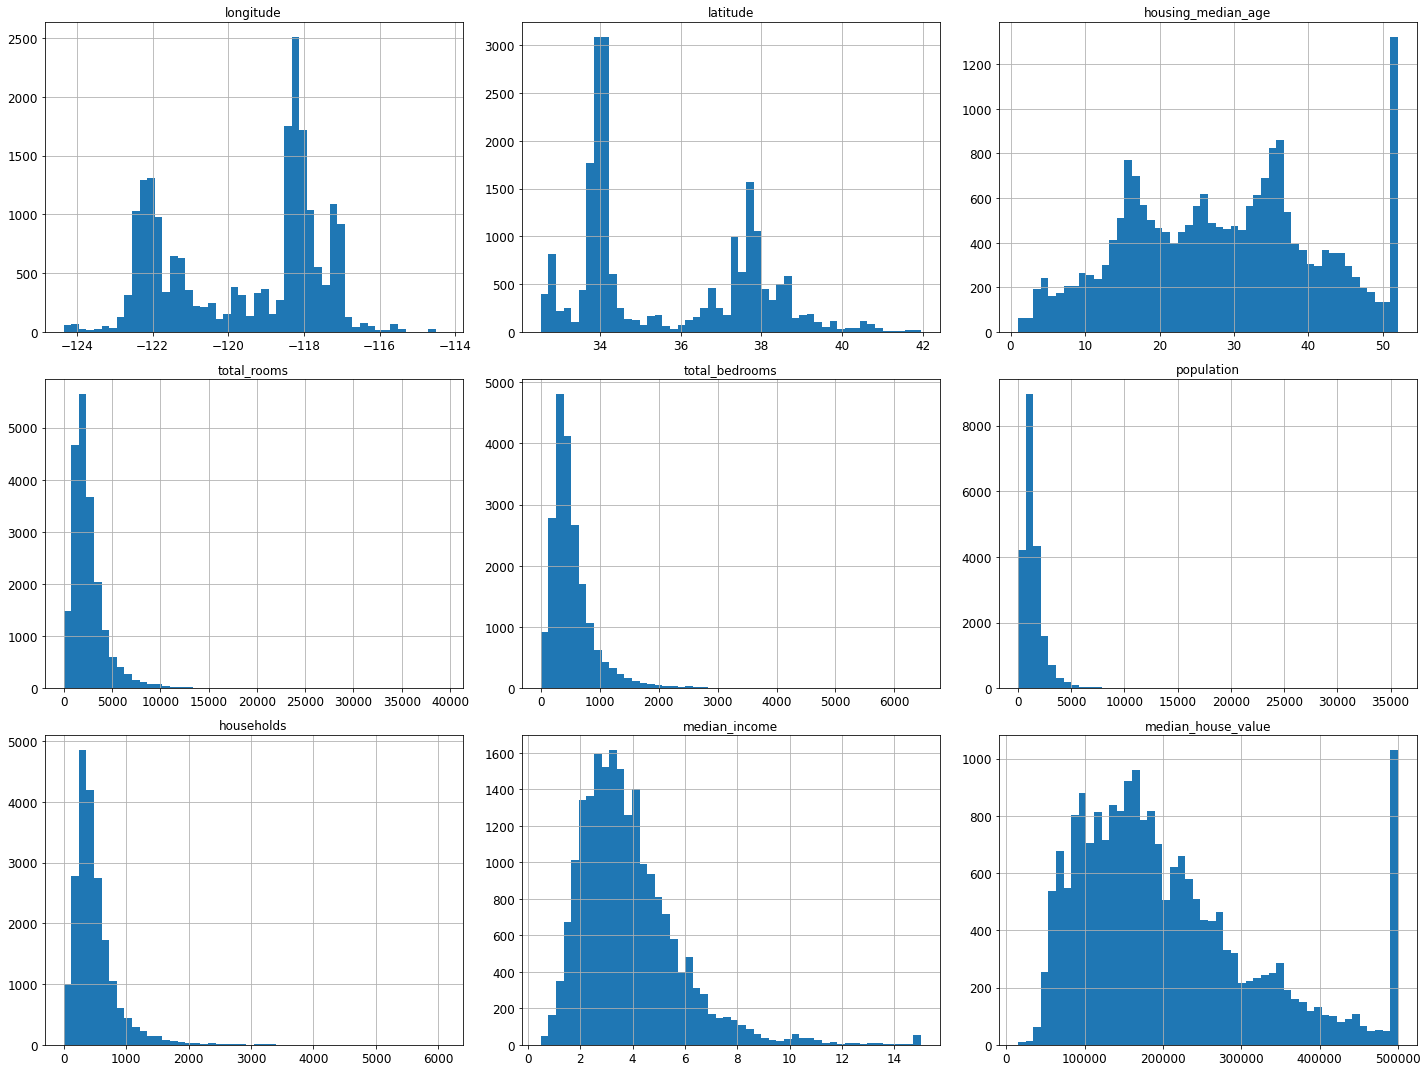

In [58]:
%matplotlib inline 
# 주피터 노트북의 매직 명령(주피터 자체의 백엔드 사용하도록 설정)
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

#### 히스토그램의 몇 가지 사항
1. 중간 소득(median income) 특성이 US달러로 표현되어 있지 않음
  - 데이터 취합 팀에서 스케일 조정, 상한 15 하한 0.5가 되도록 만듦.
  - 머신러닝에서는 전처리된 데이터를 다루는 경우가 흔하고 이것이 문제가 되지는 않지만 데이터가 어떻게 계산된 것인지 반드시 이해하고 있어야 함.
2. housing_median_age와 median_house_vlaue역시 최댓값과 최솟값 한정.
  - 중간 주택 가격의 경우 타깃 속성으로 사용되기 때문에 심각한 문제가 될 수 있음.(가격이 한계값 넘지 않도록 알고리즘이 학습될 수 있음.)
  - 클라이언트 팀(이 시스템의 출력을 사용할 팀)과 검토하는 것이 좋음.
  - 만약 500,000달러를 넘어가더라도 정확한 예측값이 필요하다고 하면 
    1. 한계값 밖의 구역에 대한 정확한 레이블을 구한다.
    2. 훈련 세트에서 이런 구역을 제거한다.($500,000가 넘는 값에 대한 예측은 평가 결과가 매우 나쁠 것이므로 테스트 세트에서도 제거)
3. 특성들의 스케일이 서로 많이 다름. 
   - 특성 스케일링 필요
4. 많은 히스토그램의 꼬리가 두꺼움 and 가운데에서 왼쪽보다 오른쪽으로 더 멀리 뻗어있음.
   - 이러한 형태는 일부 머신러닝 알고리즘에서 패턴을 찾기 어렵게 만듦. -> 종모양 분포가 되도록 변형

## _2.3.4 테스트 세트 만들기_

### caution 
    데이터를 더 깊게 들여다보기 전에 테스트 세트를 따로 떼어놓아야 한다. 그리고 테스트 세트를 절대 들여다보면 안된다.
### 데이터 스누핑(data snooping) 편향
     테스트 세트 들여다 보면, 겉으로 드러난 어떤 패턴에 속아 특정 머신러닝 모델을 선택하게 될지도 모른다.
     매우 낙관적인 추정이 되면 시스템을 론칭했을 때 기대한 성능이 나오지 않는다.


테스트 세트: 무작위로 어떤 샘플 선택해서 데이터 셋의 20%정도 떼어놓으면 됨

In [59]:
# 노트북의 실행 결과가 동일하도록
np.random.seed(42)

In [60]:
import numpy as np

# 예시로 만든 것. 실전에서는 사이킷런의 train_test_split()를 사용.
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [61]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [62]:
len(test_set)

4128

##### 프로그램을 다시 실행하면 다른 테스트 세트가 생성됨. 여러 번 계속 하면 전체 데이터셋을 보게 됨으로 피해야 함.
 1. 처음 실행에서 테스트 세트를 저장하고 다음번 실행에서 이를 불러들이기.
 2. 항상 같은 난수 인덱스가 생성되도록 np.random.permutation()호출하기 전에 난수 발생기의 초깃값 지정. ex) np.random.seed(42)
 
##### 하지만 두 해결책 모두 다음번에 업데이트된 데이터셋 사용하려면 문제가 됨.
  - 샘플의 식별자를 사용하여 테스트 세트로 보낼지 말지 정함.
  - ex) 각 샘플마다 식별자의 해시값을 계산하여 해시 최댓값의 20%보다 작거나 같은 샘플만 테스트세트로 보낼 수 있음.

In [63]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

- 주택 데이터셋에는 식별자 컬럼이 없어 행의 인덱스를 ID로 사용

In [64]:
housing_with_id = housing.reset_index()   # `index` 열이 추가된 데이터프레임을 반환합니다
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

-  행의 인덱스를 고유 식별자로 사용할 때 새 데이터는 데이터셋의 끝에 추가되어야 하고 어떤 행도 삭제되지 않아야 함.
 - 이것이 불가능할 땐 고유 식별자를 만드는 데 안전한 특성 사용
 - ex) 위도와 경도는 몇백년 후까지 안정적이라고 보장 가능 -> 두 값 연결하여 ID 생성.

In [65]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [66]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


- ##### 사이킷런에서 데이터셋 여러 서브셋으로 나누기
 
 train_test_split 특징 (split_train_test와 구분되는)
  1. 난수 초깃값 지정할 수 있는 random_state매개변수 있음
  2. 행의 개수가 같은 여러 개의 데이터셋을 넘겨 같은 인텍스를 기반으로 나눌 수 있음(데이터프레임이 레이블에 따라 여러 개로 나뉘어 있을 떄 매우 유용)

In [67]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [68]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


### 지금까지는 순수한 무작위 샘플링 방식
### 계층적 샘플링 필요
 - 테스트 세트가 전체 데이터셋에 있는 여러 소득 카테고리 잘 대표해야 함.
 - 너무 많은 계층으로 나누면 안되고 계층별로 데이터셋에 충분한 샘플 수가 있어야 함.
 

#### ex) 중간 소득 기반으로 소득 카테고리 만들기
- 중간 소득이 연속적인 숫자형 특성이므로 소득에 대한 카테고리 특성을 만들어야 함.
- 5개의 카테고리, 카테고리 1은 0-1.5범위($150,000이하), 카테고리2는 1.5-3범위

In [69]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [70]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

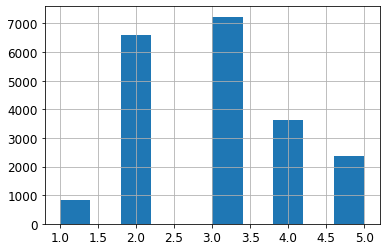

In [71]:
housing["income_cat"].hist()

#### 소득 카테고리 기반으로 계층 샘플링

In [72]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

- 테스트 세트에서 소득 카테고리의 비율

In [73]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [74]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

#### 계층 샘플링과 순수한 무작위 샘플링의 샘플링 편향 비교

In [75]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [76]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


- 계층 샘플링 테스트 세트가 전체 데이터셋에 있는 소득 카테고리의 비율과 거의 같음.
- 반면 무작위 샘플링 테스트 세트는 비율 많이 달라짐.

In [77]:
# income_cat의 특성 삭제해 데이터 원래 상태로 되돌림.

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# _*2.4 데이터 이해를 위한 탐색과 시각화*_

- #### 훈련 세트 손상시키지 않기 위해 복사본 만들어 사용

In [78]:
housing = strat_train_set.copy()

## _2.4.1 지리적 데이터 시각화_

그림 저장: bad_visualization_plot


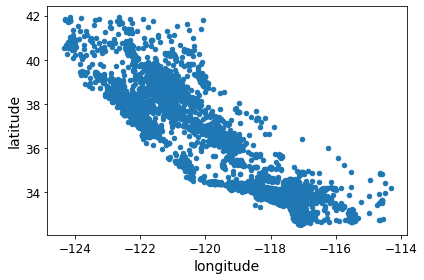

In [79]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

- 위의 그림은 특별한 패턴 찾기 힘듦 -> alpha 옵션 0.1로 주면 데이터 포인트가 밀집된 영역 잘 보여줌

그림 저장: better_visualization_plot


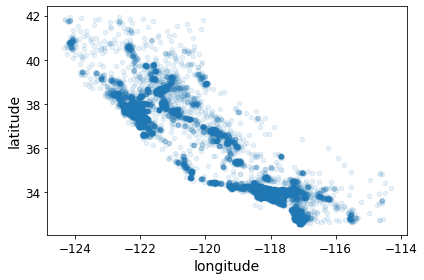

In [80]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)  #밀집이 잘 부각된 산점도
save_fig("better_visualization_plot")

- #### 주택가격 나타내기
 - 원의 반지름: 구역의 인구(매개변수 s)
 - 색상: 가격(매개변수 c)
 - 컬러 맵: jet 파란색(낮은 가격) - 빨간색(높은 가격) (매개변수 cmap)

그림 저장: housing_prices_scatterplot


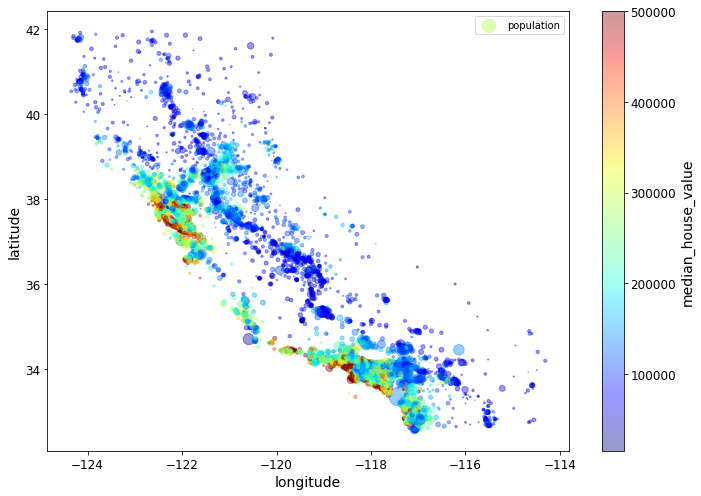

In [81]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

## _2.4.2 상관관계 조사_

- corr()메서드 이용해 "표준 상관계수" 계산

In [82]:
corr_matrix = housing.corr()

- 중간 주택 가격과 다른 특성 사이의 상관관계 크기
 (1에 가까우면 강한 양의 상관관계, -1에 가까우면 강한 음의 상관관계)

In [83]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

- 상관관계 확인하는 또 다른 방법: scatter_matrix함수 사용 (아래에서는 중간 주택 가격과 상관관계 높아 보이는 특성 몇 개만 살펴봄)

그림 저장: scatter_matrix_plot


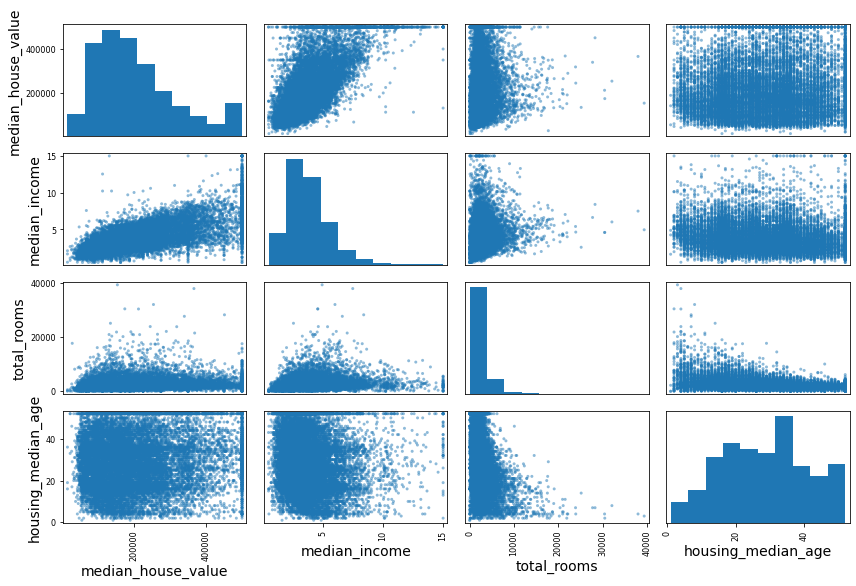

In [84]:
# from pandas.tools.plotting import scatter_matrix # 옛날 버전의 판다스에서는
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

그림 저장: income_vs_house_value_scatterplot


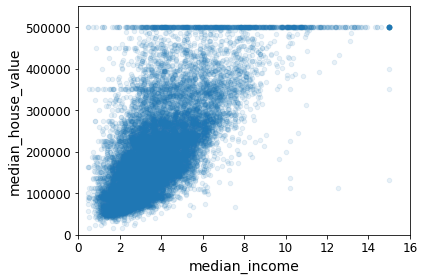

In [85]:
# 중간 주택 가격예측에 가장 유용할 것 같은 특성은 중간 소득이므로 산점도 확대
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

 - 상관관계가 매우 강함. (위쪽으로 향하는 경향, 포인트들이 너무 널리 퍼져 있지 않음)
 - 앞서 본 가격 제한 값이 500,000달러에서 수평선으로 잘 보임.
 - 450,000달러, 350,000달러, 280,000달러에도 수평선이 보이며 그 아래도 조금 더 보임 => 이런 이상한 형태 학습하지 않도록 해당 구역 제거 필요

## _특성 조합으로 실험_

 - 데이터 준비하기 전 여러 특성의 조합 시도 -> 프로젝트에서 반복되는 과정
 - 가구당 방 개수, 룸당 침실 수, 가구당 인원수 등의 특성 만들어 봄 -> 더 유용한 상관관계 보여줌

In [86]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [87]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# 2.5 _머신러닝 알고리즘을 위한 데이터 준비_

- #### 데이터 준비 작업을 함수로 만들어 자동화해야 하는 이유

 - 어떤 데이터셋에 대해서도 데이터 변환 손쉽게 반복 가능
 - 향후 프로젝트에 사용할 수 있는 변환 라이브러리 점진적 구축
 - 실제 시스템에서 알고리즘에 새 데이터 주입 전에 변환시키는 데 이 함수 사용할 수 있음
 - 여러 가자 데이터 변환을 쉽게 시도해볼 수 있고 어떤 조합이 가장 좋은지 확인하는 데 용이

In [88]:
housing = strat_train_set.drop("median_house_value", axis=1) # 훈련 세트를 위해 레이블 삭제

# 예측 변수와 타깃값에 같은 변형 적용하지 않기 위해 예측변수와 레이블 분리
housing_labels = strat_train_set["median_house_value"].copy()

## _2.5.2 데이터 정제_

- #### 누락된 특성 다루기
 - housing.dropna(subset=["total_bedrooms"])    # 옵션 1 (해당 구역 제거)
 - housing.drop("total_bedrooms", axis=1)       # 옵션 2 (전체 특성 삭제)
 - median = housing["total_bedrooms"].median()  # 옵션 3 (어떤 값으로 채우기 ex)0, 편균, 중간 값 등)
 - housing["total_bedrooms"].fillna(median, inplace=True)

각 옵션을 설명하기 위해 주택 데이터셋의 복사본을 만듭니다. 이 때 적어도 하나의 열이 비어 있는 행만 고릅니다. 이렇게 하면 각 옵션의 정확한 동작을 눈으로 쉽게 확인할 수 있습니다.

In [89]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [90]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # 옵션 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [91]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # 옵션 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [92]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # 옵션 3

In [93]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


#### 사이킷런의 SimpleImputer로 누락 값 다루기

In [94]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")  # SimpleImputer객체 생성

 - 중간 값은 수치형 특성에서만 계산될 수 있으므로 텍스트 특성(ocean_proximity)삭제한 데이터 복사본 생성

In [95]:
housing_num = housing.drop("ocean_proximity", axis=1)
# 다른 방법: housing_num = housing.select_dtypes(include=[np.number])

In [96]:
imputer.fit(housing_num)  # imputer는 각 특성의 중간값을 계산해서 그 결과를 객체의 statistics_ 속성에 저장

SimpleImputer(strategy='median')

In [97]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [98]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

이제 학습된 imputer 객체 사용해 훈련 세트에서 누락된 값을 학습한 중간값으로 바꿀 수 있다.

In [99]:
X = imputer.transform(housing_num) # 변형된 특성들이 들어 있는 평범한 넘파이 배열

In [100]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,  # X를 판다스 데이터프레임으로 되돌리기
                          index=housing_num.index)

In [101]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [102]:
imputer.strategy

'median'

In [103]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


## _2.5.2 텍스트와 범주형 특성 다루기_

이제 범주형 입력 특성인 ocean_proximity을 전처리 함.

In [104]:
# 처음 10개 샘플에서 특성값 확인

housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


 - 각 값은 카테고리를 나타냄 =>  이 특성은 범주형
 - 대부분의 머신러닝 알고리즘은 숫자를 다루므로 숫자로 변환 (OrdinalEncoder 클래스 사용)

In [105]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

categories_ 인스턴스 변수를 사용해 카테고리 목록 얻기. -> 범주형 특성마다 카테고리들의 ID배열을 담은 리스트 반환됨.

In [106]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

이것의 문제점은 떨어져있는 두 값보다 가까이에 있는 두 값을 더 빗슷하다고 생각

##### "원-핫 인코딩" 
 카테고리별 이진 특성을 만들어 해결

In [107]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

OneHotEncoder는 기본적으로 희소 행렬을 반환합니다. 필요하면 toarray() 메서드를 사용해 밀집 배열로 변환할 수 있습니다:

In [108]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

또는 OneHotEncoder를 만들 때 sparse=False로 지정할 수 있습니다:

In [109]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [110]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## 2.5.3 나만의 변환기

In [111]:
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

책에서는 간단하게 인덱스 (3, 4, 5, 6)을 하드코딩했지만 다음처럼 동적으로 처리하는 것이 더 좋다.

In [112]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # 열 인덱스 구하기

또한 housing_extra_attribs는 넘파이 배열이기 때문에 열 이름이 없습니다(안타깝지만 사이킷런을 사용할 때 생기는 문제입니다). DataFrame으로 복원하려면 다음과 같이 할 수 있습니다:

In [113]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.00885,2.707965
14650,-117.2,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.50581,3.047847


## 2.5.4 특성 스케일링

1. #### min-maz 스케일링(정규화)
 - (data-최솟값)/(최대값-최솟값)  
 - 0에서 1범위에 들도록 값 이동, 스케일 조정
 - 사이킷런에서 MinMazScaler 변환기 제공
 - 0에서 1범위 원치 않으면 feature_range 매개변수로 범위 변경
2. #### 표준화
 - (data-평균)/표준편차 -> 분포의 분산 1이 되게 함
 - 범위의 상한과 하한이 없어 문제가 될 수 있음
 - 이상치에 영향 덜 받음
 - 사이킷런에서 StandardScaler 변환기 제공

#### caution
    모든 변환기에서 스케일링은 (테스트 세트가 포함된)전체 데이터가 아니고 훈련 데이터에 대해서만 fit()메서드 적용해야 함.
    그런 다음 훈련 세트와 테스트 세트(그리고 새로운 데이터)에 대해 transform()메서드를 사용.

## _2.5.5 변환 파이프라인_

수치형 특성을 전처리하기 위해 파이프라인을 만듦

In [114]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [115]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

- #### 하나의 변환기로 각 열마다 적절한 변환 적용하여 모든 열 처리 -> ColumnTransformer

In [116]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [117]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [118]:
housing_prepared.shape

(16512, 16)

# _모델 선택과 훈련_

## _2.6.1 훈련 세트에서 훈련하고 평가하기_

In [119]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [122]:
# 훈련 샘플 몇 개를 사용해 전체 파이프라인을 적용해 보겠습니다
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("예측:", lin_reg.predict(some_data_prepared))
print("레이블:", list(some_labels)) # 실제값과 비교

예측: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
레이블: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [123]:
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

#### 전체 훈련 세트에 대한 이 회귀 모델의 RMSE측정

In [124]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

 - 대부분의 주택 가격 120,000달러에서 265,000사이 => 예측오차가 68,628인 것은 매우 만족 스럽지 못함. 
 - #### 모델이 훈련 데이터에 과소적합된 것.
   - 더 강력한 모델 선택
   - 더 좋은 특성 주입
   - 모델의 구제 감소 (이 모델에서는 규제 사용 X)

더 복잡한 모델 시도

In [125]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [126]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

 오차가 없다 -> 과대적합된 것으로 보임.

## 2.6.2 교차 검증을 사용한 평가

#### K-겹 교차 검증
- 폴드라 불리는 10개의 서브셋으로 무작위로 분할
- 10번 훈련하고 평가하는데 매번 다른 폴드 선택해 평가에 사용, 9개 폴드는 훈련에 사용
- 10개의 평가 점수가 담긴 배열이 결과

In [127]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [128]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

display_scores(tree_rmse_scores)

점수: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
평균: 71407.68766037929
표준 편차: 2439.4345041191004


성능 좋지 않음, 
모델 여러 번 훈련시켜야 해서 비용이 비쌈 -> 언제나 쓸 수 있는 것은 아님

#### 선형 회귀 모델 점수

In [129]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
평균: 69052.46136345083
표준 편차: 2731.6740017983493


#### RandomForestRegressor 모델
 앙상블 학습

In [130]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [131]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

In [132]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
평균: 50182.303100336096
표준 편차: 2097.0810550985693


# _2.7 모델 세부 튜닝_

## _2.7.1 그리드 탐색_

- 만족할 만한 하이퍼파라미터 조합을 찾을 때까지 수동으로 하이퍼파라미터 조정
- 사이킷런의 GridSearchCV 사용
- 탐색하고자 하는 하이퍼파라미터와 시도해볼 값 지정
- 가능한 모든 하이퍼파라미터 조합에 대해 교차 검증 사용해 평가함

In [138]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 12(=3×4)개의 하이퍼파라미터 조합을 시도합니다.
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도합니다.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# 다섯 개의 폴드로 훈련하면 총 (12+6)*5=90번의 훈련이 일어납니다.
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

최상의 하이퍼파라미터 조합

In [139]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [140]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

하이퍼파라미터 조합의 점수 확인

In [141]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [142]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.902596,0.709618,0.026717,0.001925,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.837622e+09,-4.147108e+09,...,-4.053756e+09,1.519591e+08,18,-1.064113e+09,-1.105142e+09,-1.116550e+09,-1.112342e+09,-1.129650e+09,-1.105559e+09,2.220402e+07
1,2.348032,0.525641,0.105427,0.032898,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.047771e+09,-3.254861e+09,...,-3.094374e+09,1.327062e+08,11,-5.927175e+08,-5.870952e+08,-5.776964e+08,-5.716332e+08,-5.802501e+08,-5.818785e+08,7.345821e+06
2,5.473460,0.115388,0.212538,0.006154,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.689185e+09,-3.021086e+09,...,-2.849913e+09,1.626875e+08,9,-4.381089e+08,-4.391272e+08,-4.371702e+08,-4.376955e+08,-4.452654e+08,-4.394734e+08,2.966320e+06
3,0.952384,0.131834,0.027956,0.001452,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.730181e+09,-3.786886e+09,...,-3.716847e+09,1.631510e+08,16,-9.865163e+08,-1.012565e+09,-9.169425e+08,-1.037400e+09,-9.707739e+08,-9.848396e+08,4.084607e+07
4,2.938231,0.151192,0.074424,0.002696,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.666283e+09,-2.784511e+09,...,-2.781618e+09,1.268607e+08,8,-5.097115e+08,-5.162820e+08,-4.962893e+08,-5.436192e+08,-5.160297e+08,-5.163863e+08,1.542862e+07
5,8.774158,0.322146,0.229208,0.036197,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.387153e+09,-2.588448e+09,...,-2.537883e+09,1.214614e+08,3,-3.838835e+08,-3.880268e+08,-3.790867e+08,-4.040957e+08,-3.845520e+08,-3.879289e+08,8.571233e+06
6,1.208172,0.055325,0.028509,0.003194,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.119657e+09,-3.586319e+09,...,-3.441458e+09,1.893056e+08,14,-9.245343e+08,-8.886939e+08,-9.353135e+08,-9.009801e+08,-8.624664e+08,-9.023976e+08,2.591445e+07
7,4.088480,0.283824,0.080173,0.004499,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.549663e+09,-2.782039e+09,...,-2.704645e+09,1.471569e+08,6,-4.980344e+08,-5.045869e+08,-4.994664e+08,-4.990325e+08,-5.055542e+08,-5.013349e+08,3.100456e+06
8,11.773144,0.272894,0.210226,0.004015,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.370010e+09,-2.583638e+09,...,-2.514673e+09,1.285080e+08,2,-3.838538e+08,-3.804711e+08,-3.805218e+08,-3.856095e+08,-3.901917e+08,-3.841296e+08,3.617057e+06
9,1.471848,0.033581,0.027127,0.001939,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.353504e+09,-3.348552e+09,...,-3.348850e+09,1.241939e+08,13,-9.228123e+08,-8.553031e+08,-8.603321e+08,-8.881964e+08,-9.151287e+08,-8.883545e+08,2.750227e+07


## _2.7.2 랜덤 탐색_

- 하이퍼파라미터 탐색 공간이 커지면 RandomizedSearhCV 사용하는 편이 더 좋다.
- 모든 조합을 시도하는 대신 각 반복마다 하이퍼파라미터에 임의의 수를 대입하여 지정한 횟수만큼 평가한다.
- 장점 1. 랜덤 탐색 1000회 반복하도록 시행하면 하이퍼파라미터마다 각기 다른 1000개의 값 탐색(그리드탐색에서는 몇개의 값만 탐색)
- 장점 2. 단순히 반복 횟수를 조절하는 것만으로 하이퍼파라미터 탐색에 투입할 컴퓨팅 자원 제어 가능

In [143]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C72C322F40>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C72C322C70>},
                   random_state=42, scoring='neg_mean_squared_error')

In [144]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.70756927707 {'max_features': 7, 'n_estimators': 180}
51389.889203389284 {'max_features': 5, 'n_estimators': 15}
50796.155224308866 {'max_features': 3, 'n_estimators': 72}
50835.13360315349 {'max_features': 5, 'n_estimators': 21}
49280.9449827171 {'max_features': 7, 'n_estimators': 122}
50774.90662363929 {'max_features': 3, 'n_estimators': 75}
50682.78888164288 {'max_features': 3, 'n_estimators': 88}
49608.99608105296 {'max_features': 5, 'n_estimators': 100}
50473.61930350219 {'max_features': 3, 'n_estimators': 150}
64429.84143294435 {'max_features': 5, 'n_estimators': 2}


## _2.7.3 앙상블 방법_

- 최상의 모델 연결해보기
- 모델의 그룹(앙상블)이 최상의 단일 모델보다 더 나은 성능을 발휘할 때가 많다.
- 특히 개개의 모델이 각기 다른 형태의 오차를 만들 때 그렇다.
- 7장에서 자세히 다룸

## _2.7.4 최상의 모델과 오차 분석_

정확한 예측을 위한 각 특성의 상대적 중요도

In [145]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

중요도 다음에 그에 대응하는 특성 이름 표시

In [146]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # 예전 방식
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

- 이 정보를 바탕으로 덜 중요한 특성 제외 가능
- 특정 오차가 생겼다면 왜 발생했는지, 해결 방법은 무엇인지 찾아야 함. ex) 추가 특성 포함, 불필요한 특성 제거, 이상치 제외

## _2.7.5 테스트 세트로 시스템 평가하기_

In [147]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [148]:
final_rmse

47730.22690385927

테스트 RMSE에 대한 95% 신뢰 구간을 계산

In [149]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45685.10470776, 49691.25001878])

# _연습문제_